In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os

In [2]:
sns.set(font_scale=1.5)

In [3]:
# Raman spectrum class
class raman_spectrum:
    def __init__(self,fname):
        self.fname = fname
        self.fname0 = self.fname.split('/')[-1]
        self.df = pd.read_csv(fname + '.tsv', sep='\t', header =7)
        self.df.rename(columns={'Tags':'Raman Shift, cm-1', self.df.columns[1]:'Intensity, %'}, inplace = True)
        self.df.replace([np.inf, -np.inf], np.nan, inplace=True)
        self.df.dropna(inplace = True)
        #self.normalize()
    
    def normalize(self):
        self.df["Normalized Intensity"] = (self.df["Intensity, %"] - ( min0:=self.df["Intensity, %"].min()) )/(self.df["Intensity, %"].max() - min0) 
    
    
    def plot(self, color, label):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Intensity, %", color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 
        
    def plot_n(self, color, label, marker = None):
        sns.lineplot(self.df, x = "Raman Shift, cm-1", y = "Normalized Intensity", marker = marker, color = color, label = label)
        plt.xlabel(r'Raman Shift, $cm^{-1}$') 

In [4]:
dir_path = "Data/"

In [5]:
notebook_dir = os.getcwd()
os.chdir(dir_path)
files = os.listdir()
files.sort(key=lambda x: os.path.getmtime(x))

In [6]:
f_pumpkin = [f.split('.')[0] for f in files if "bg" not in f and "Reference" not in f]
f_pumpkin_bg = [f.split('.')[0] for f in files if "bg" in f]

In [7]:
def collect_spectra(ff):
    ss = []
    for f in ff:
        ss.append(raman_spectrum(f))
    return ss

In [8]:
s_pumpkin = collect_spectra(f_pumpkin)
s_pumpkin_bg = collect_spectra(f_pumpkin_bg)

In [9]:
os.chdir(notebook_dir)

In [10]:
cc = ['black', 'brown','darkolivegreen','green','darkkhaki', 'gold','orange', 'darkorange','orangered','red' ]
ii = np.arange(0,10)

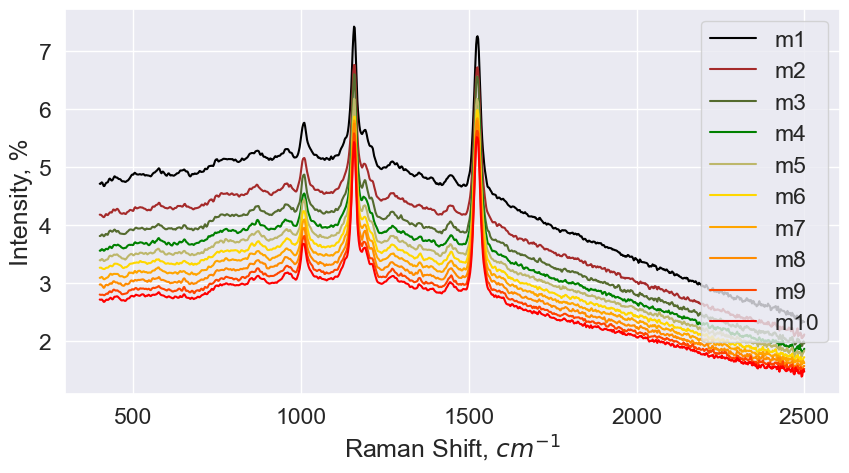

In [11]:
plt.figure(figsize = (10,5))
for s,c,i in zip(s_pumpkin,cc,ii):
    s.plot(c,"m" + str(i+1))
plt.savefig("pumpkin.png", dpi = 300, bbox_inches='tight')

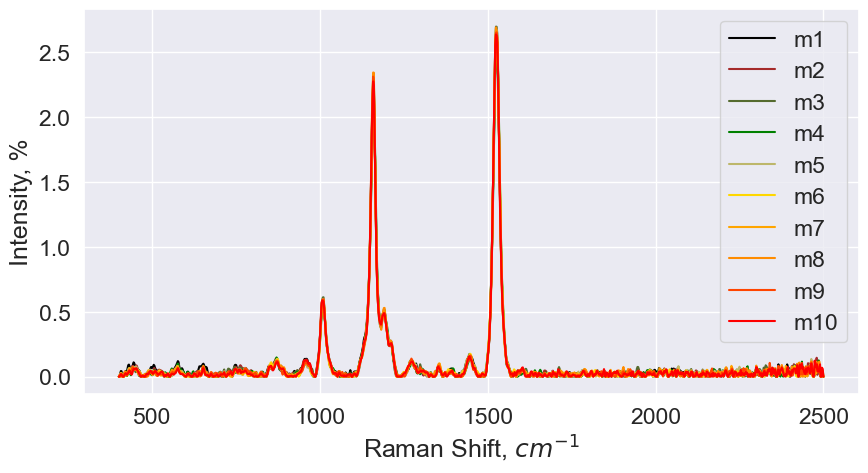

In [12]:
plt.figure(figsize = (10,5))
for s,c,i in zip(s_pumpkin_bg,cc,ii):
    s.plot(c,"m" + str(i+1))
plt.savefig("pumpkin_baseline_corrected.png", dpi = 300, bbox_inches='tight')

In [13]:
def average_spectra(ss):
    s_av = ss[0]
    s_av.df["Intensity, %"]*= 0

    for s in ss:
        s_av.df["Intensity, %"] += s.df["Intensity, %"]
    s_av.df["Intensity, %"] /= len(ss)
    s_av.normalize()
    return s_av

In [14]:
s_pumpkin_av = average_spectra(s_pumpkin)
s_pumpkin_bg_av = average_spectra(s_pumpkin_bg)

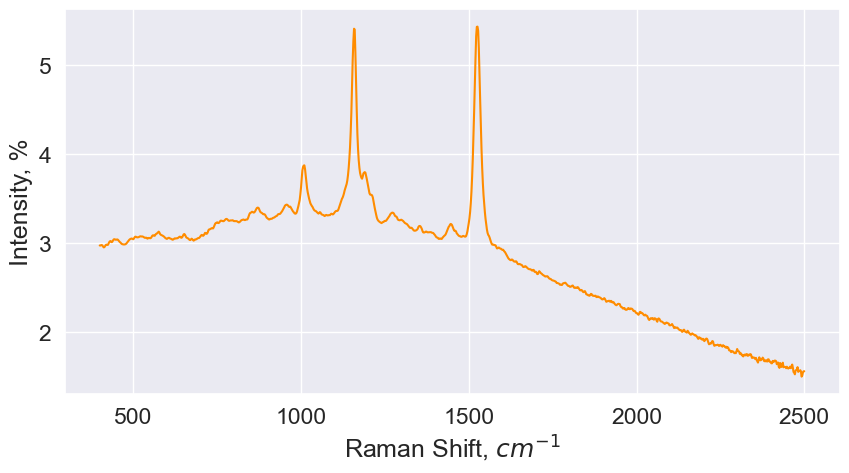

In [15]:
plt.figure(figsize = (10,5))
s_pumpkin_av.plot("darkorange", "")
plt.savefig("pumpkin_averaged.png", dpi = 300, bbox_inches='tight')

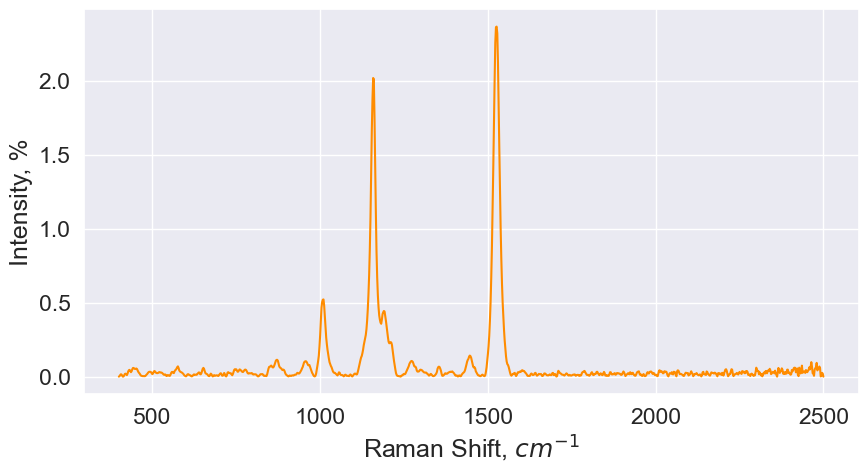

In [16]:
plt.figure(figsize = (10,5))
s_pumpkin_bg_av.plot("darkorange", "")
plt.savefig("pumpkin_baseline_corrected_averaged.png", dpi = 300, bbox_inches='tight')